In [2]:
using Convex
using SCS
using XLSX
using DataFrames
using Plots
using CSV
using Statistics
using Images
using DelimitedFiles

In [4]:
T = DataFrame(XLSX.readtable("C:/Users/kgtrm/Documents/VSC Code/jupyter stuff/stock_prices.xlsx","Sheet2")...)

,MSFT,FB,AAPL
,Any,Any,Any
1,101.93,137.95,148.26
2,102.8,143.8,152.29
3,107.71,150.04,156.82
4,107.17,149.01,157.76
5,102.78,165.71,166.52
6,105.67,167.33,170.41
7,108.22,162.5,170.42
8,110.97,161.89,172.97
9,112.53,162.28,174.97


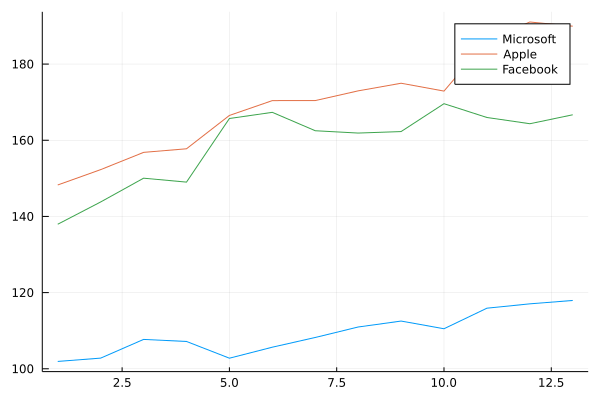

In [5]:
plot(T[!,:MSFT],label="Microsoft")
plot!(T[!,:AAPL],label="Apple")
plot!(T[!,:FB],label="Facebook")

In [7]:
# convert the prices to a matrix to be used later
# in the optimization problem
prices_matrix = Matrix(T)

13×3 Matrix{Any}:
 101.93  137.95  148.26
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

In [8]:
M1 = prices_matrix[1:end-1,:]
M2 = prices_matrix[2:end,:]
R = (M2.-M1)./M1

12×3 Matrix{Float64}:
  0.00853527   0.0424067    0.027182
  0.0477626    0.0433936    0.0297459
 -0.00501346  -0.00686484   0.00599413
 -0.040963     0.112073     0.0555274
  0.0281183    0.00977611   0.0233606
  0.0241317   -0.0288651    5.8682e-5
  0.0254112   -0.00375385   0.014963
  0.0140579    0.00240904   0.0115627
 -0.0179508    0.0451072   -0.0117734
  0.0488644   -0.0213443    0.0763981
  0.00983522  -0.00988071   0.0264883
  0.00760359   0.0142996   -0.00575766

In [9]:
risk_matrix = cov(R)

3×3 Matrix{Float64}:
  0.000659383  -0.000630653  0.000139112
 -0.000630653   0.00152162   0.000192288
  0.000139112   0.000192288  0.000635503

In [10]:
# note that the risk matrix is positive definite
isposdef(risk_matrix)

true

In [11]:
r = mean(R,dims=1)[:]

3-element Vector{Float64}:
 0.012532748705136572
 0.016563036855293173
 0.02114580465503291

In [13]:
x = Variable(length(r))
problem = minimize(x'*risk_matrix*x,[sum(x)==1;r'*x>=0.02;x.>0])

minimize
└─ * (Convex.NotDcp; real)
   ├─ * (affine; real)
   │  ├─ adjoint (affine; real)
   │  │  └─ …
   │  └─ 3×3 Matrix{Float64}
   └─ 3-element real variable (id: 145…946)
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 145…946)
   └─ 0

status: `solve!` not called yet

┌ Warning: Expression not DCP compliant. Trying to solve non-DCP compliant problems can lead to unexpected behavior.
└ @ Convex C:\Users\kgtrm\.julia\packages\Convex\ubaUN\src\dcp.jl:25


In [14]:
# make the problem DCP compliant
problem = minimize(Convex.quadform(x, risk_matrix), [sum(x) == 1; r'*x >= 0.02; x .> 0])

minimize
└─ * (convex; positive)
   ├─ 1
   └─ qol_elem (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ …
      └─ [1.0]
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 145…946)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 145…946)
   └─ 0

status: `solve!` not called yet

In [15]:
solve!(problem, SCS.Optimizer)

----------------------------------------------------------------------------
	SCS v2.1.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 24, CG tol ~ 1/iter^(2.00)
eps = 1.00e-005, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 6, constraints m = 14
Cones:	primal zero / dual free vars: 2
	linear vars: 5
	soc vars: 7, soc blks: 2
Setup time: 1.65e-004s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.71e+019 2.86e+019 1.00e+000 -3.40e+019 5.17e+018 5.49e+019 6.75e-005 
    97|4.78e-011 1.28e-010 1.08e-010 4.85e-004 4.85e-004 3.76e-017 1.10e-001 
-------------------------------------------

In [16]:
x

Variable
size: (3, 1)
sign: real
vexity: affine
id: 145…946
value: [0.06795414742252917, 0.12230857118794068, 0.8097372814405625]

In [19]:
sum(x.value)

1.0000000000510323

In [20]:
# return
r' * x.value

1×1 adjoint(::Vector{Float64}) with eltype Float64:
 0.020000000000662013

In [21]:
x.value .* 1000

3×1 Matrix{Float64}:
  67.95414742252918
 122.30857118794069
 809.7372814405625

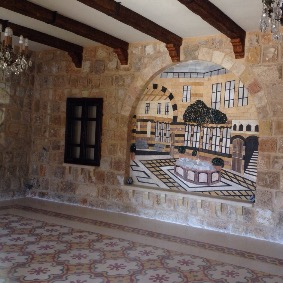

In [3]:
Kref = load("C:/Users/kgtrm/Documents/VSC Code/jupyter stuff/khiam-small.jpg")

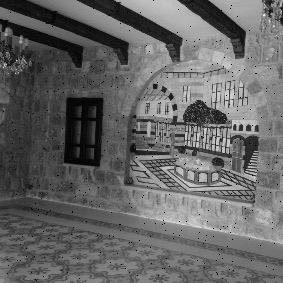

In [4]:
K = copy(Kref)
p = prod(size(K))
missingids = rand(1:p, 400)
K[missingids] .= RGBX{N0f8}(0.0,0.0,0.0)
K
Gray.(K)

In [5]:
Y = Float64.(Gray.(K));

In [6]:
correctids = findall(Y[:].!=0)
X = Convex.Variable(size(Y))
problem = minimize(nuclearnorm(X))
problem.constraints += X[correctids] == Y[correctids]

1-element Vector{Constraint}:
 == constraint (affine)
├─ index (affine; real)
│  └─ 283×283 real variable (id: 143…576)
└─ 79689-element Vector{Float64}

In [7]:
solve!(problem, SCS.Optimizer(eps = 1e-3, alpha = 1.5))

----------------------------------------------------------------------------
	SCS v2.1.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 400329, CG tol ~ 1/iter^(2.00)
eps = 1.00e-003, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 240268, constraints m = 400046
Cones:	primal zero / dual free vars: 239585
	sd vars: 160461, sd blks: 1
Setup time: 2.65e-001s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.04e+021 5.63e+019 1.00e+000 -1.54e+024 1.44e+022 1.16e+024 6.81e-001 
   100|5.12e-002 2.22e-002 1.39e-004 4.41e+002 4.41e+002 3.13e-015 4.30e+001 
   200|1.55e-002 7.78e-003 4.06e-005 4

norm(float.(Gray.(Kref)) - X.value) = 1.221318120094262
norm(-(X.value)) = 124.3398575477403


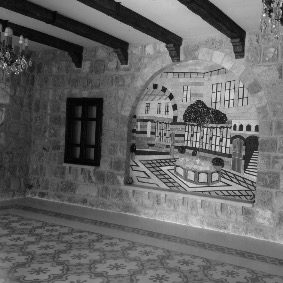

In [11]:
@show norm(float.(Gray.(Kref))-X.value)
@show norm(-X.value)
colorview(Gray, X.value)

In [13]:
using JuMP
using GLPK

In [14]:
category_data = JuMP.Containers.DenseAxisArray(
    [1800 2200;
     91   Inf;
     0    65;
     0    1779],
    ["calories", "protein", "fat", "sodium"],
    ["min", "max"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
    Dimension 2, ["min", "max"]
And data, a 4×2 Matrix{Float64}:
 1800.0  2200.0
   91.0    Inf
    0.0    65.0
    0.0  1779.0

In [15]:
@show category_data["calories", "max"]
@show category_data["fat", "min"]
;

category_data["calories", "max"] = 2200.0
category_data["fat", "min"] = 0.0


In [16]:
foods = ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]

# we will sue the same concept we used above to create an array indexed
# by foods this time to recored the cost of each of these items

cost = JuMP.Containers.DenseAxisArray(
    [2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59],
    foods)

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{Float64}:
 2.49
 2.89
 1.5
 1.89
 2.09
 1.99
 2.49
 0.89
 1.59

In [17]:
food_data = JuMP.Containers.DenseAxisArray(
    [410 24 26 730;
     420 32 10 1190;
     560 20 32 1800;
     380  4 19 270;
     320 12 10 930;
     320 15 12 820;
     320 31 12 1230;
     100  8 2.5 125;
     330  8 10 180], 
    foods, 
    ["calories", "protein", "fat", "sodium"])

@show food_data["chicken", "fat"]
@show food_data["milk", "sodium"]
;

food_data["chicken", "fat"] = 10.0
food_data["milk", "sodium"] = 125.0


In [20]:
# set up the model
model = Model(GLPK.Optimizer)

categories = ["calories", "protein", "fat", "sodium"]

# add the variables
@variables(model, begin
    # Variables for the nutrition info
    category_data[c, "min"] <= nutrition[c = categories] <= category_data[c, "max"]
    # Variables for which foods to buy
    buy[foods] >= 0
end)

# Objective - mimize cost
@objective(model, Min, sum(cost[f] * buy[f] for f in foods))

# Nutrition constraints
@constraint(model, [c in categories],
    sum(food_data[f,c] * buy[f] for f in foods) == nutrition[c]
)

1-dimensional DenseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape},1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -nutrition[calories] + 410 buy[hamburger] + 420 buy[chicken] + 560 buy[hot dog] + 380 buy[fries] + 320 buy[macaroni] + 320 buy[pizza] + 320 buy[salad] + 100 buy[milk] + 330 buy[ice cream] == 0.0
 -nutrition[protein] + 24 buy[hamburger] + 32 buy[chicken] + 20 buy[hot dog] + 4 buy[fries] + 12 buy[macaroni] + 15 buy[pizza] + 31 buy[salad] + 8 buy[milk] + 8 buy[ice cream] == 0.0
 -nutrition[fat] + 26 buy[hamburger] + 10 buy[chicken] + 32 buy[hot dog] + 19 buy[fries] + 10 buy[macaroni] + 12 buy[pizza] + 12 buy[salad] + 2.5 buy[milk] + 10 buy[ice cream] =

In [21]:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)
is_optimal = term_status == MOI.OPTIMAL
@show JuMP.primal_status(model) == MOI.FEASIBLE_POINT
@show JuMP.objective_value(model) ≈ 11.8288 atol = 1e-4

JuMP.primal_status(model) == MOI.FEASIBLE_POINT = true
JuMP.objective_value(model) ≈ 11.8288 = false
atol = 0.0001 = 0.0001


0.0001

In [22]:
hcat(buy.data, JuMP.value.(buy.data))

9×2 Matrix{AffExpr}:
 buy[hamburger]  0.6045138888888888
 buy[chicken]    0
 buy[hot dog]    0
 buy[fries]      0
 buy[macaroni]   0
 buy[pizza]      0
 buy[salad]      0
 buy[milk]       6.9701388888888935
 buy[ice cream]  2.591319444444441

In [25]:
passportdata = readdlm("C:/Users/kgtrm/Documents/VSC Code/jupyter stuff/passport-index-matrix.csv", ',')

200×200 Matrix{Any}:
 "Passport"                "Albania"    "Algeria"        …    "Afghanistan"
 "Afghanistan"             "e-visa"     "visa required"     -1
 "Albania"               -1             "visa required"       "visa required"
 "Algeria"                 "e-visa"   -1                      "visa required"
 "Andorra"               90             "visa required"       "visa required"
 "Angola"                  "e-visa"     "visa required"  …    "visa required"
 "Antigua and Barbuda"   90             "visa required"       "visa required"
 "Argentina"             90             "visa required"       "visa required"
 "Armenia"               90             "visa required"       "visa required"
 "Australia"             90             "visa required"       "visa required"
 "Austria"               90             "visa required"  …    "visa required"
 "Azerbaijan"            90             "visa required"       "visa required"
 "Bahamas"               90             "visa required"     

In [27]:
cntr = passportdata[2:end, 1]
vf = (x -> typeof(x)==Int64 || x == "VF" || x == "VOA" ? 1 : 0).(passportdata[2:end, 2:end]);

In [29]:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [30]:
@variable(model, pass[1:length(cntr)], Bin)
@constraint(model, [j=1:length(cntr)], sum(vf[i,j]*pass[i] for i in 1:length(cntr)) >= 1)
@objective(model, Min, sum(pass))

pass[1] + pass[2] + pass[3] + pass[4] + pass[5] + pass[6] + pass[7] + pass[8] + pass[9] + pass[10] + pass[11] + pass[12] + pass[13] + pass[14] + pass[15] + pass[16] + pass[17] + pass[18] + pass[19] + pass[20] + pass[21] + pass[22] + pass[23] + pass[24] + pass[25] + pass[26] + pass[27] + pass[28] + pass[29] + pass[30] + pass[31] + pass[32] + pass[33] + pass[34] + pass[35] + pass[36] + pass[37] + pass[38] + pass[39] + pass[40] + pass[41] + pass[42] + pass[43] + pass[44] + pass[45] + pass[46] + pass[47] + pass[48] + pass[49] + pass[50] + pass[51] + pass[52] + pass[53] + pass[54] + pass[55] + pass[56] + pass[57] + pass[58] + pass[59] + pass[60] + pass[61] + pass[62] + pass[63] + pass[64] + pass[65] + pass[66] + pass[67] + pass[68] + pass[69] + pass[70] + pass[71] + pass[72] + pass[73] + pass[74] + pass[75] + pass[76] + pass[77] + pass[78] + pass[79] + pass[80] + pass[81] + pass[82] + pass[83] + pass[84] + pass[85] + pass[86] + pass[87] + pass[88] + pass[89] + pass[90] + pass[91] + pass[92]

In [31]:
JuMP.optimize!(model)

In [32]:
print(JuMP.objective_value(model), " passports: ", join(cntr[findall(JuMP.value.(pass) .== 1)], ", "))

65.0 passports: Afghanistan, Angola, Australia, Azerbaijan, Bahrain, Bosnia and Herzegovina, Brunei, Cambodia, Cameroon, Canada, Chile, Colombia, Comoros, DR Congo, Djibouti, Equatorial Guinea, Eritrea, Fiji, Gabon, Guinea-Bissau, Hong Kong, Hungary, India, Indonesia, Iraq, Ireland, Israel, Jamaica, Japan, Kuwait, Laos, Liberia, Libya, Macao, Madagascar, Malaysia, Marshall Islands, Mauritania, Mauritius, Micronesia, Mongolia, Nauru, Nepal, New Zealand, North Korea, Norway, Oman, Palestine, Papua New Guinea, Qatar, Russia, Saudi Arabia, Singapore, Solomon Islands, Somalia, South Sudan, Sri Lanka, Syria, Taiwan, Timor-Leste, Togo, Turkmenistan, United States, Uruguay, Vietnam